In [3]:
# Load Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# SVM: Support Vector Machines

# Data

We will use the make_blobs function of samples_generator to generate random numbers with k centers and the scatter function to draw them.

In [6]:
from sklearn.datasets import make_blobs
?make_blobs

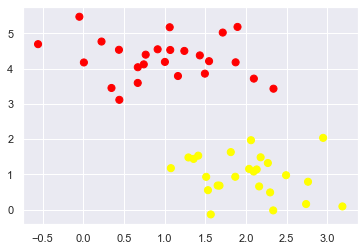

In [9]:
# 50 points with 2 centroids
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Two different classes are obtained, the red and the yellow, perfectly separable.

# Lineal SVM

A linear classifier tries to draw a straight line that separates the two groups of points and therefore creates a model for its classification. That is, the goal is to build an optimal hyperplane that separates the classes.

For two-dimensional data like the one in the example it could be done by hand. But we immediately see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

The optimal hyperplane is one that maximizes the distances of all the closest points of each class. Which reduces the possibility of misclassifying a new one.

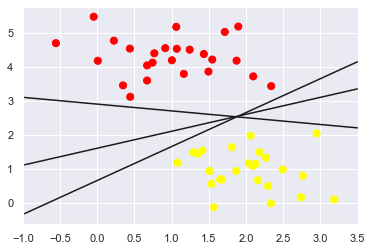

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These three lines or hyperplanes are very different separators that, however, perfectly discriminate between these samples.

Let's imagine a new red point and see how each hyperplane will assign its label.

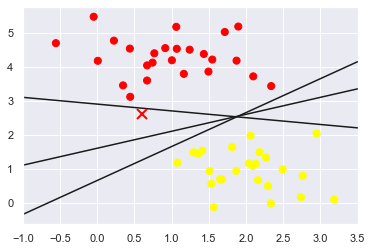

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);
plt.plot([0.6], [2.6], 'x', color='red', markeredgewidth=2, markersize=10)

Depending on which one we choose, a new data point will be assigned a different label (for example, the one marked with the "X" in this graph).

Therefore, we must have a technique that allows us to choose the best hyperplane in this problem.

# **Support Vector Machines:** Maximum Margin

The goal is to find the hyperplane that best generalizes to the problem.

To do this, the distance to the closest point to the hyperplane is calculated and maximized.

We can graphically draw these hyperplanes with a band that touches the closest point.

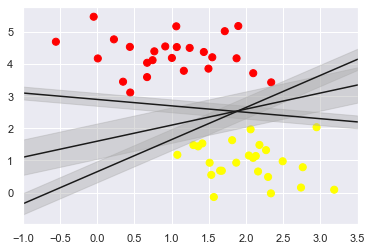

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

# SVM model

With this intuition we are going to build the first models.

Let's load the necessary function for SVC.

In [15]:
from sklearn.svm import SVC # "Support vector classifier"

Let's train a model with C choosen manually.

In [8]:
# 3) Define model
model = SVC(kernel='linear', C=10000000000)

Entrenamos el modelo

In [9]:
# 4) Train model
model.fit(X, y)

SVC(C=10000000000, kernel='linear')

We create a function that allows us to paint the hyperplane, with the decision margins and the support vectors, those that fall on the margin.

In [18]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

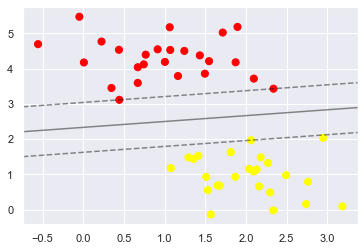

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Which points are the support vectors?

In [12]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In this case we have 3 support vectors, 2 red and one yellow.

# Hyperparameter C

In real life we will have less perfect cases and we will find mixed data from the different classes.

We are going to create this type of data using the make_blobs function.

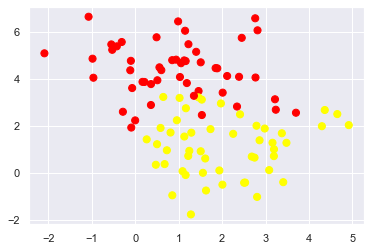

In [10]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2) # Increased cluster_std
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

When the data cannot be completely linearly separated or the problem is too complex to classify correctly, we can tell the model a good generalization even if not all data is classified perfect.

This can be controlled with the hyperparameter C, which gives us the complexity of the model.

- A **small C** can give a too simple model with **undefitting**.

- A **big C** can be a model that does not generalize well and fits the train a lot, model with **overfitting**.

We are going to draw a plot that allows us to visualize how changing the regularization parameter C, the margin is modified and allows the model to wrongly classify more patterns.

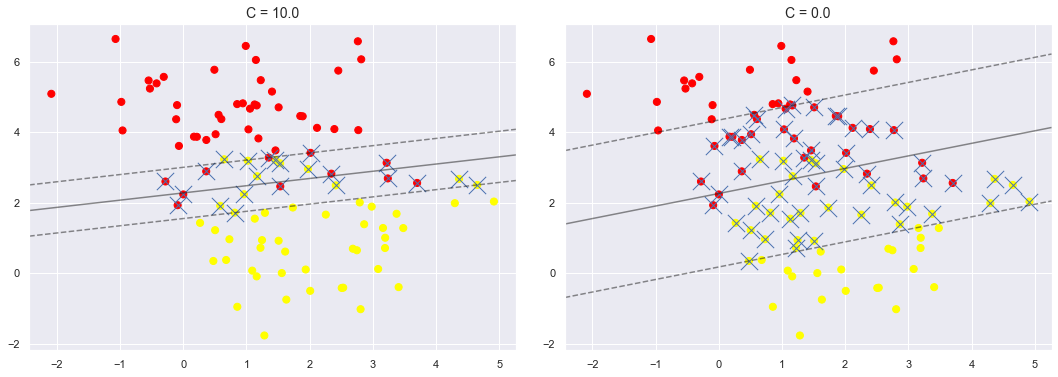

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, marker='x');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In the first case C = 10 we allow fewer errors.

In the second where C is smaller, C = 0.1, the number of misclassified patterns increases.

Depending on the number of errors that we want to allow to our model, we will have one C or another.

This C should be chosen through a metaparameterization or grid search.

# Non linear SVM (Kernel Trick)


Using the sample_generator library with the make_circles function we create data that is not linearly separable.

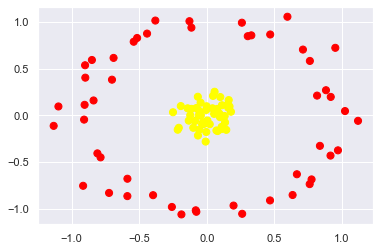

In [13]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Let's try to make a linear model using the kernel = linear parameter.

In [16]:
?SVC

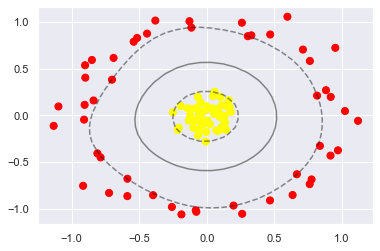

In [19]:
clf = SVC(kernel='rbf', C = 1000).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

As we can see, the hyperplane is not capable of separating the data since there are red dots on both sides.

To solve this problem we use the **Kernel Trick**.

It consists of taking the data to a new spatial dimension that allows us to separate the classes with a linear separator.

We create the Radial basis function that will allow us to take the data to another dimension.

In [20]:
z = np.exp(-(X ** 2).sum(1))

We can now visualize the data in three dimensions.

In [18]:
from mpl_toolkits.mplot3d import Axes3D

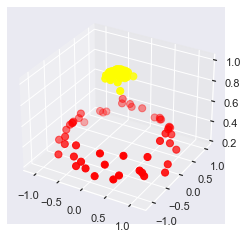

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ax.scatter3D( X[:,0],  X[:,1], z, c=y, s=50, cmap='autumn');


In this new splace the data is linearly separable by a hyperplane.

When going back to the original space, this hyperplane will have a non-linear shape.

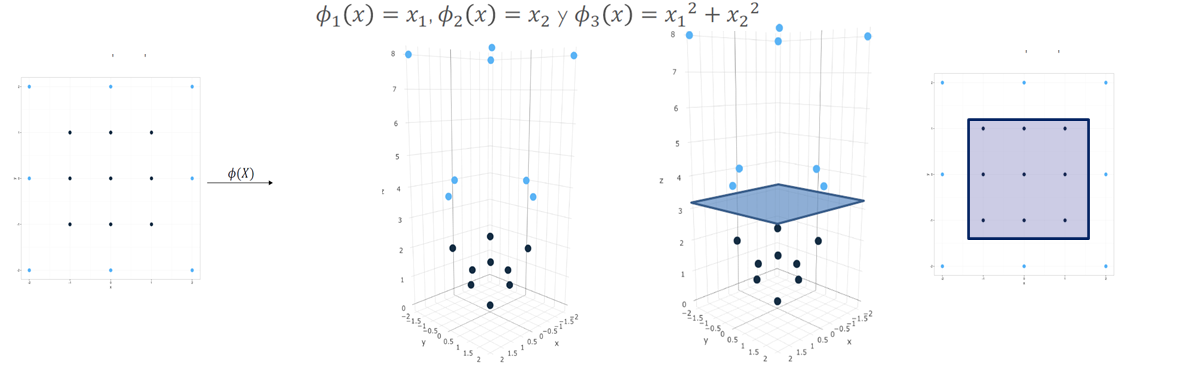

In python with Scikit-Learn, we can apply SVM for non-linearly separable data using the kernel trick.

We simply change our linear kernel to an RBF kernel (radial basis function), using the kernel hyperparameter.

In [22]:
clf = SVC(kernel='rbf', C = 1000)
clf.fit(X, y)

SVC(C=1000)

We now paint visualize the data together with the hyperplane obtained with our non-linear SVM.

In [22]:
?SVC


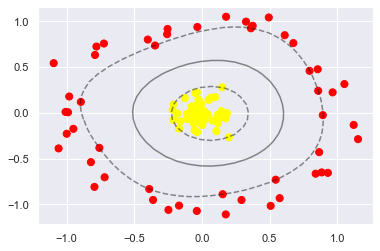

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y,b s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');


We can see that now the data are perfectly separated by a non-linear separator.

# Cherkassky Hyperparameters

Although there are no rules that define the optimal SVM hyperparameter for a particular problem, **Cherkassky** proposed a statistical solution that takes into account the distribution and volume of the problem data.

**Proposed C Hyperparameter**


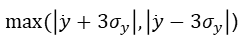

**Proposed Gamma Hyperparameter**

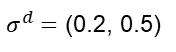

**Reference**: http://people.ece.umn.edu/users/cherkass/N2002-SI-SVM-13-whole.pdf

They can be coded this way.

In [24]:
d = X.shape[1];
m = np.mean(y);
s = np.std(y);

In [25]:
C_cherk = np.max([np.abs(m + 3*s),np.abs(m - 3*s)]);
gamma_cherk = np.power(0.2, 1/d)

In [26]:
print('Proposed C = %.2f. Proposed gamma = %.2f' % (C_cherk, gamma_cherk))

Proposed C = 2.00. Proposed gamma = 0.45


These values should be assumed to be the optimal ones, but can be used as an extra value to test in the grid search, or as a center of that grid.